# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [2]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제하였을 경우 수정하지 않으셔도 됩니다.)
WORK_SPACE = ""

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# 영상 파일 경로
VIDEO_PATH = ROOT_PATH + "/video"
# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"


### 3) 비디오 데이터 다운로드하기
아래 코드를 실행하세요.

In [ ]:
# test data 다운로드
!pip install gdown

import gdown
import shutil
import zipfile
 
google_path = 'https://drive.google.com/uc?id='
file_id = '1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca'
output_name = 'video.zip'

# 파일 다운로드
gdown.download(google_path+file_id,output_name,quiet=False)

# 파일 위치 이동
shutil.move("./" + output_name, ROOT_PATH)

zip_file = ROOT_PATH + "/video.zip"

# 압축해제 
with zipfile.ZipFile(zip_file) as z:
    z.extractall(ROOT_PATH)

os.remove(zip_file)

In [7]:
# 압축해제 

zip_file = '/content/drive/MyDrive/AIVLE3rd_individual/individual/video_individual.zip'

with zipfile.ZipFile(zip_file) as z:
    z.extractall('/content/drive/MyDrive/AIVLE3rd_individual/individual')

os.remove(zip_file)

### 4) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [12]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

# 데이터 탐색부터 먼저 시작해보겠습니다.

## ▣ 데이터 소개
[기본 데이터]
* 원본 영상 : 슈퍼맨이 돌아왔다 '21년 7월 영상을 출연진 별로 가공한 영상
* 파일 경로 : .VIDEO_PATH = "./video"
* 파일명 : park.mp4, sam.mp4, sayuri.mp4, jung.mp4

---

## 1. 데이터 불러오기

### 1) 비디오 데이터 확인하기

<font color="green">[실습문제]</font> 1. 비디오 데이터들의 경로를 <u>LIST</u>에  저장하기
* 파일 경로에서 파일들의 경로를 변수명 "video_list" 리스트에 저장하세요. 
> <font color="red"><b>[Hint]</b></font> <br>
> 비디오 파일 경로는 <u>'VIDEO_PATH'</u> 입니다.<br>
> 영상 파일 확장자는 <u>'mp4'</u> 입니다. <br>
> 라이브러리 <u>'glob'</u>을 활용하여 파일들 경로 리스트를 만들 수 있습니다.

In [11]:
# 실습해보세요.
video_list = os.listdir(VIDEO_PATH)
video_list

['sam.mp4', 'jung.mp4', 'park.mp4', 'sayuri.mp4']

<font color="green">[실습문제]</font> 2. 비디오 파일들의 졍보를 확인하세요. (openCV 활용)



In [15]:
# 실습해보세요.
## 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이

for v in video_list:
  path = VIDEO_PATH + '/' + v
  video = cv2.VideoCapture(path)
  if video.isOpened():
    video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
    video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
    video_fps = video.get(cv2.CAP_PROP_FPS)
    video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
    print("영상 제목 : ", v)
    print("가로 : ", video_width)
    print("세로 : ", video_height)
    print("FPS : ", video_fps)
    print("총 프레임 수 : ", video_length)
    print("영상 길이 : %d초" %round(video_length/video_fps))
    print("===========================")
  video.release()

  else : 
    break

영상 제목 :  sam.mp4
가로 :  854.0
세로 :  480.0
FPS :  30.0
총 프레임 수 :  27001.0
영상 길이 : 900초
영상 제목 :  jung.mp4
가로 :  854.0
세로 :  480.0
FPS :  30.0
총 프레임 수 :  27001.0
영상 길이 : 900초
영상 제목 :  park.mp4
가로 :  854.0
세로 :  480.0
FPS :  30.0
총 프레임 수 :  37801.0
영상 길이 : 1260초
영상 제목 :  sayuri.mp4
가로 :  854.0
세로 :  480.0
FPS :  30.0
총 프레임 수 :  37801.0
영상 길이 : 1260초


### 2) 동영상 프레임 단위로 나눠 이미지 데이터 만들기

<font color="green">[실습문제]</font> 3. 이미지 추출하여 저장하기
* 위에서 저장한 "video_list"에 있는 파일들을 분할하여 이미지 데이터로 만드세요.
* 이미지 저장 경로 : IMAGE_PATH = ROOT_PATH + "/image" <br>
> <font color="red"><b>[Hint]</b></font> <br>
> 파일의 경로가 저장된 video_list를 for문을 활용해서 하나씩 불러오세요.

In [20]:
# 실습해보세요.

TIME_MEASUREMENT_UNIT = 5
TRAIN_PATH = ROOT_PATH + '/train'

for v in video_list:
  path = VIDEO_PATH + '/' + v
  video = cv2.VideoCapture(path)
  while video.isOpened():
    ret, frame = video.read()
    if ret : 
      frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
      if (frame_sec % TIME_MEASUREMENT_UNIT == 0):
        file_name = TRAIN_PATH + '/' + v.split('.')[0] + '/' + str(round(frame_sec)) + '.jpg'
        cv2.imwrite(file_name, frame)
    else:
      break
      
  video.release()

<font color="green">[실습문제]</font> 4. 이미지 파일 열어서 확인하기
* 전체 이미지 중 각 출연진 별로 5장을 열어서 확인해보세요.
> <font color="red"><b>[Hint]</b></font> <br>
> matplotlib subplot() 함수를 사용해 보세요.<br>
> 참고1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# <br>
> 참고2. https://foss4g.tistory.com/1263

In [57]:
# 실습해보세요.
def show_image_5(name):
  for i in range(5):
    image = cv2.imread(TRAIN_PATH + '/' + name + '/' + str(i*5) + '.jpg')
    rgb_image = image[:,:,::-1]
    plt.subplot(1, 5, i+1)
    plt.title(name + '_' + str(i*5))
    plt.imshow(rgb_image)

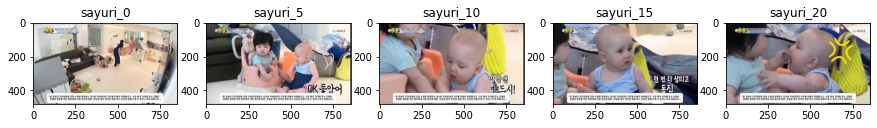

In [58]:
show_image_5('sayuri')

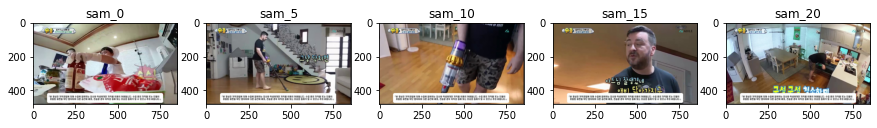

In [59]:
show_image_5('sam')

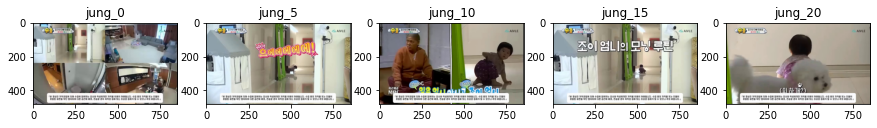

In [61]:
show_image_5('jung')

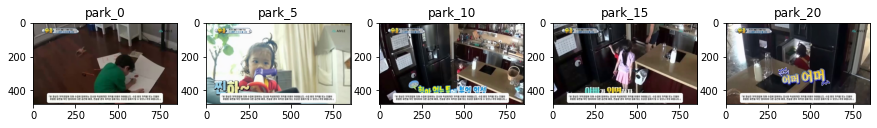

In [62]:
show_image_5('park')